In [1]:
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import animation

In [2]:
f = lambda x, y: x * np.sin(3 * x) + 1.1 * y * np.sin(3 * y) + 0.5 * x + 0.2 * y

<IPython.core.display.Javascript object>


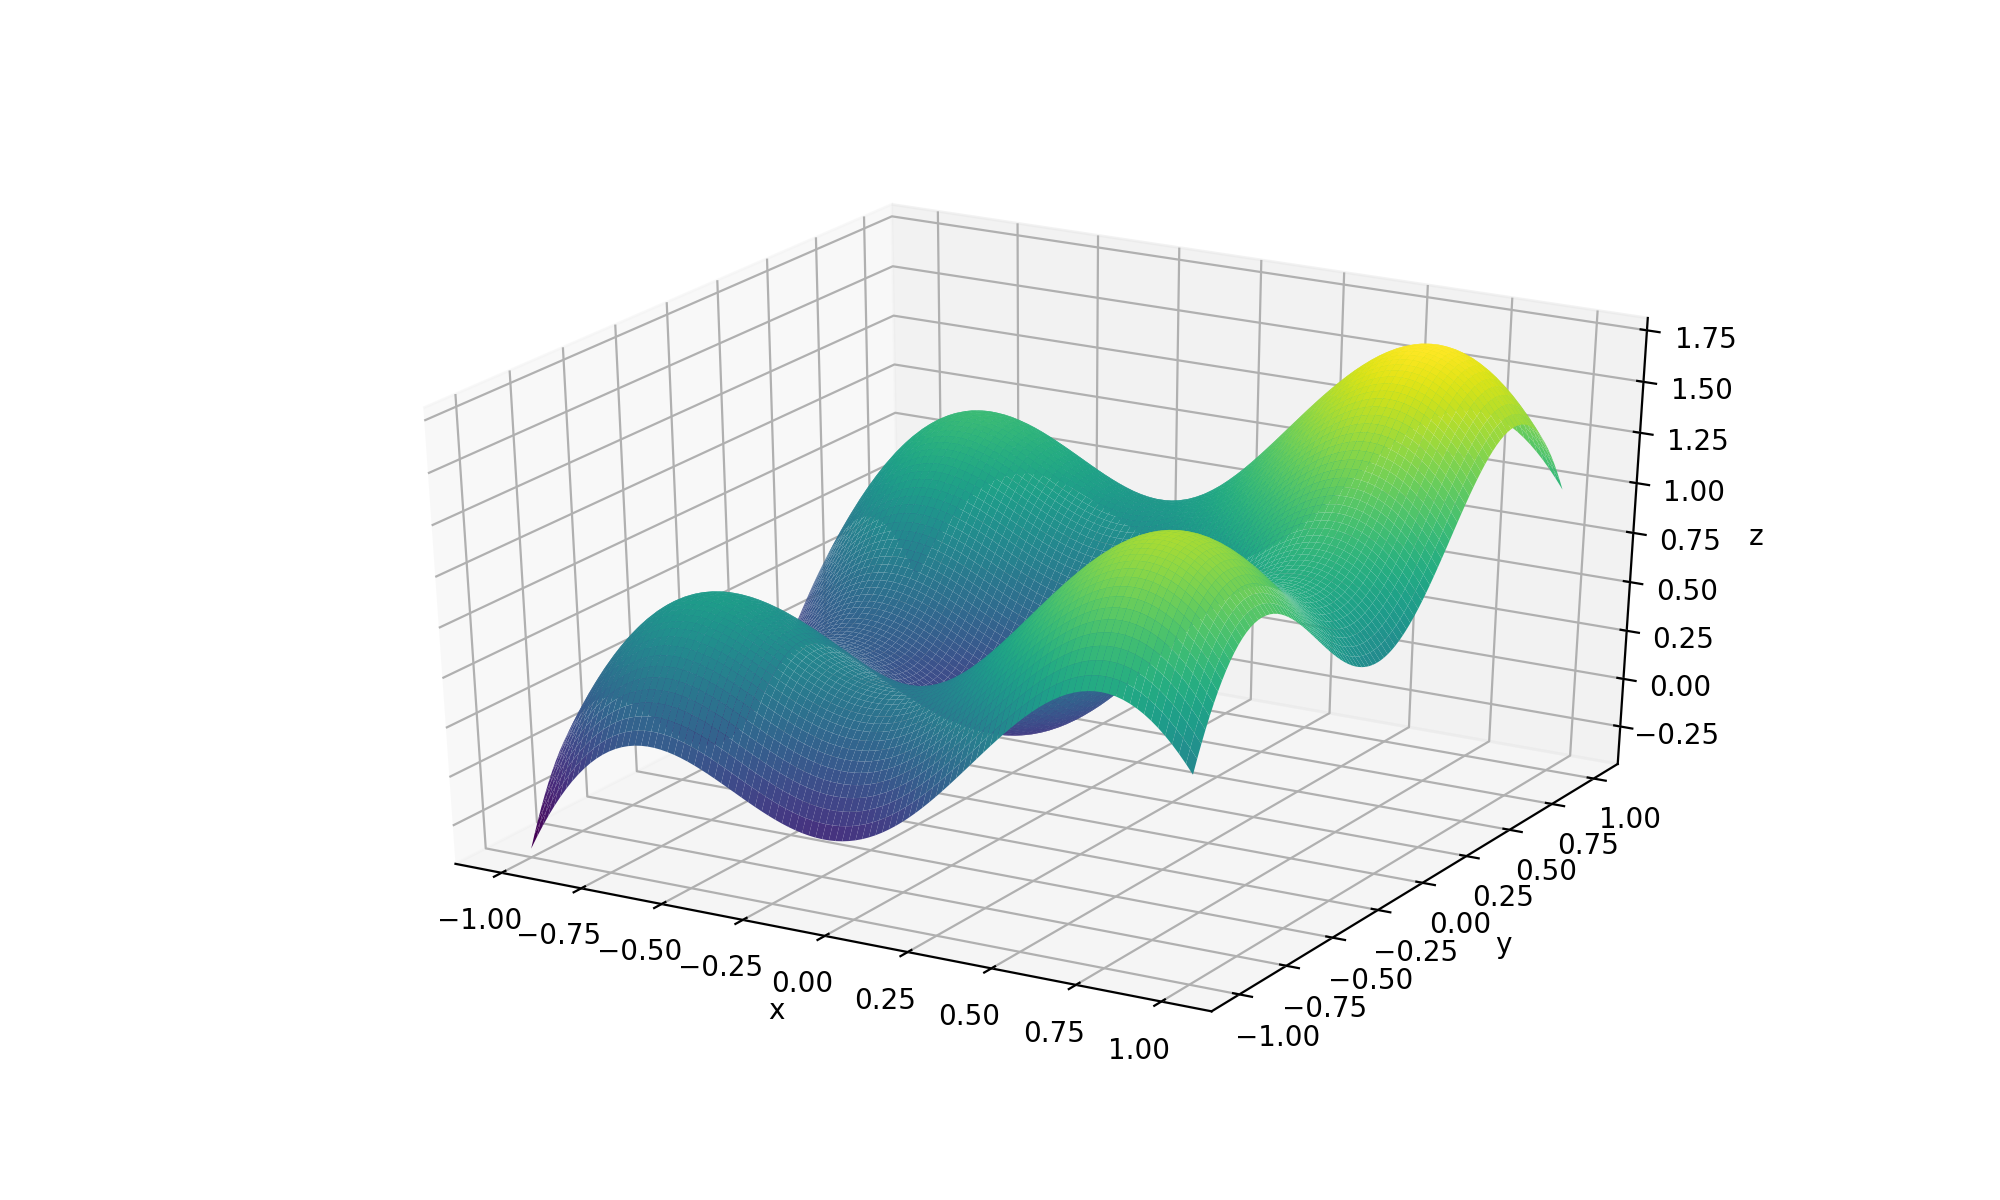

In [3]:

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection="3d")

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [4]:
N_population = 16
R_mutation = 0.05
N_iteration = 100

fitness = f

x_random = lambda: 2 * np.random.random() - 1
y_random = lambda: 2 * np.random.random() - 1

population = np.array([(x_random(), y_random()) for i in range(N_population)])

def next_generation(population, r_survie=0.5):
    n_pop = len(population)
    
    fitness_list = [fitness(x, y) for x, y in population]
    rank = np.argsort(fitness_list)[::-1]
    n_survie = int(n_pop * r_survie)
    candidates = population[rank[:n_survie], :]
    
    p_mating = [i / sum(range(1, n_survie + 1)) for i in range(1, n_survie + 1)]
    n_mating = int((N_population - n_survie)/2)
    
    new_population = candidates.copy()
    for i in range(n_mating):
        
        # Allow self-production
        parents = candidates[np.random.choice(range(n_survie), size=2, p=p_mating), :]
        offsprings = parents.copy()
        beta = np.random.random()
        crossover_parameter = np.random.randint(2)
        fix_paramenter = 2 - crossover_parameter

        offsprings[:, crossover_parameter] = np.array([[beta, 1-beta], [1-beta, beta]]).dot(
            parents[:, crossover_parameter])
        
        for offspring in offsprings:
            if np.random.random() < R_mutation:
                k = np.random.randint(len(offspring))
                if k == 0:
                    offspring[k] = x_random()
                else:
                    offspring[k] = y_random()
                    
        new_population = np.vstack([new_population, offsprings])
    return new_population

In [5]:
pop_all = []
for i in range(N_iteration):
    population = next_generation(population)
    pop_all += [population]

<IPython.core.display.Javascript object>


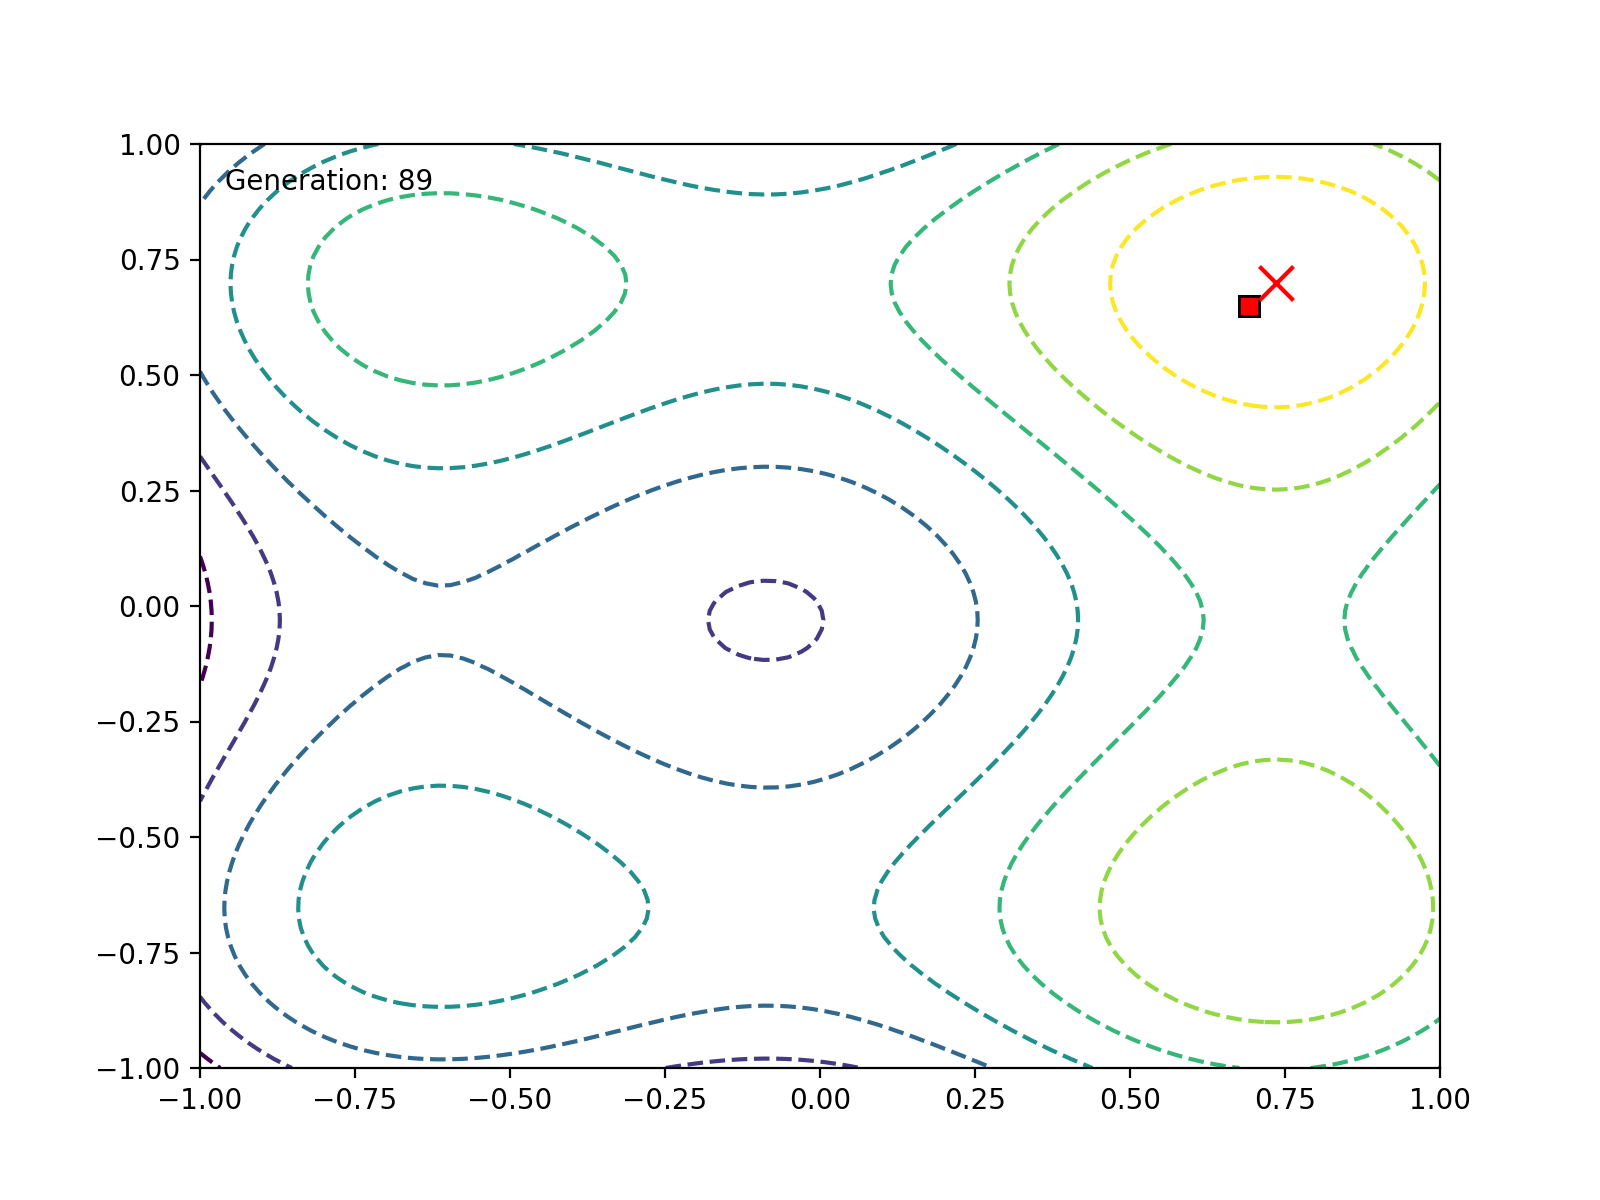

In [6]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))

def init():
    ax.contour(X, Y, Z, linestyles='dashed', rstride=1, cstride=1, cmap='viridis')


def animate(i):
    ax.clear()
    population = pop_all[i]
    ax.contour(X, Y, Z, linestyles='dashed', rstride=1, cstride=1, cmap='viridis')
    x, y = population[:, 0], population[:, 1]
    
    scatter = ax.scatter(x, y, marker='s', c='r', edgecolors='k', s=50)
    
    ax.scatter(0.7348848848848849, 0.6981981981981982, c='r', marker='x', s = 150)
    ax.text(0.02, 0.95, 'Generation: %d' %i, transform=ax.transAxes)
#     ax.text(0.02, 0.90, 'Optimal: %d' %Zpot, transform=ax.transAxes)
#     ax.text(0.02, 0.84,'Best Fit: %d' %max(y), transform=ax.transAxes)
#     ax.text(0.02, 0.79, 'Average Fit: %d' %np.mean(y), transform=ax.transAxes)
    
    return scatter

anim = animation.FuncAnimation(fig, func=animate, init_func=init, frames=N_iteration, interval=500, blit=True)

plt.show()

In [7]:
# f = lambda x, y: x * np.sin(3 * x) + 1.1 * y * np.sin(3 * y) + 0.5 * x + 0.2 * y
# ax.clear()
# x = np.linspace(-1, 1, 100)
# y = np.linspace(-1, 1, 100)
# X, Y = np.meshgrid(x, y)
# Z = f(X, Y)
# fig = plt.figure(figsize=(10, 6))
# ax = plt.axes(projection="3d")

# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
#ax.view_init(60, 35)

# def animate(i):
#     population = pop_all[i]

#     ax.clear()
#     ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', alpha=0.8)
#     x, y = population[range(5), 0], population[range(5), 1]
#     z = [f(x, y) for x, y in zip(x, y)]
    
#     scatter = ax.scatter3D(x, y, z, marker='s', c='r', edgecolors='k', s=50)
#     return scatter

# anim = animation.FuncAnimation(fig, animate, frames=50, interval=500, blit=True)

In [8]:
# vmax = -np.inf
# xopt = None
# yopt = None
# for x in np.linspace(0.6, 0.8, 1000):
#     for y in np.linspace(0.6, 0.8, 1000):
#         if f(x, y) > vmax:
#             xopt, yopt =x, y
#             vmax = f(x, y)
            
# print(xopt, yopt, vmax)